**Application on the Breast Cancer Wisconsin data from sklearn. This data comprises 569 samples with 30 real-valued features extracted from digitized images of fine needle aspirates of breast masses. These features encapsulate details about the characteristics of cell nuclei in the images, aiding algorithms in accurately predicting cancer diagnoses.**

Load necessary packages

In [1]:
# Load Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

Build the perceptron

In [2]:
# Perceptron
class Perceptron(object):
    def __init__(self, eta = 0.05, epochs = 500):
        self.eta = eta
        self.epochs = epochs
    
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])

        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)

        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Load the Breast Cancer Wisconsin data. For simplicity, we use the first two features.

In [3]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
X = cancer_data.data[:,:2]
y = cancer_data.target

y = np.array([-1 if x == 0 else x for x in y])

Apply the perceptron

In [4]:
# Instantiate one instance of the perceptron class
percep = Perceptron(eta = 0.1, epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

The training accuracy

In [6]:
y_hat = percep.predict(X)

sum(y == y_hat)/len(X)

0.875219683655536

Illustrate the training results

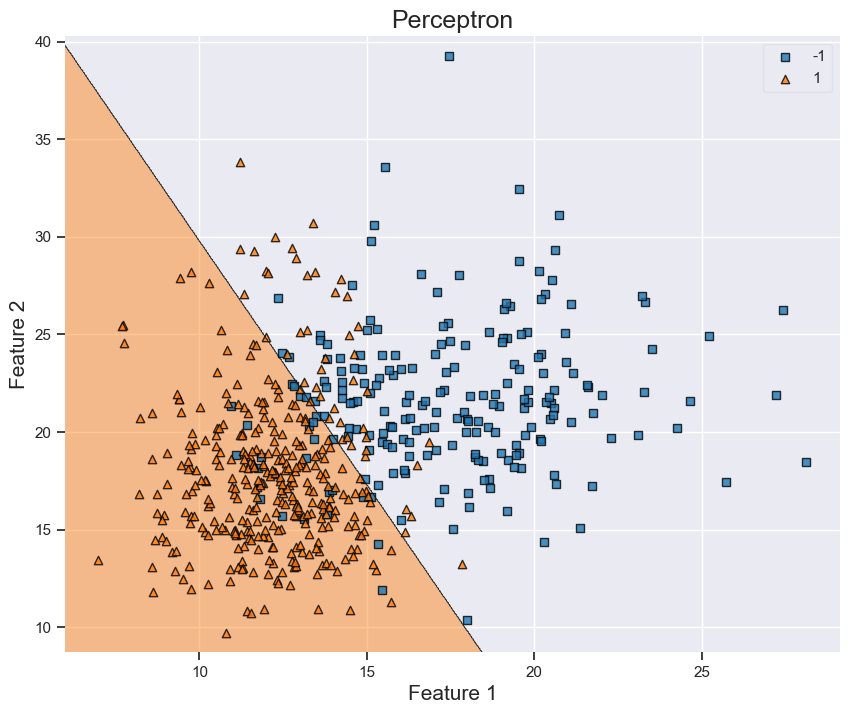

In [7]:
plt.figure(figsize = (10,8))
plot_decision_regions(X, y, clf = percep)
plt.title("Perceptron", fontsize = 18)
plt.xlabel("Feature 1", fontsize = 15)
plt.ylabel("Feature 2", fontsize = 15)
plt.show()

<span style="color: blue;">As we can see from the output of the code above, we have found a nice linear seperator which has classified out data. We have an 87.5% accuracy.</span>

View errors over each epoch

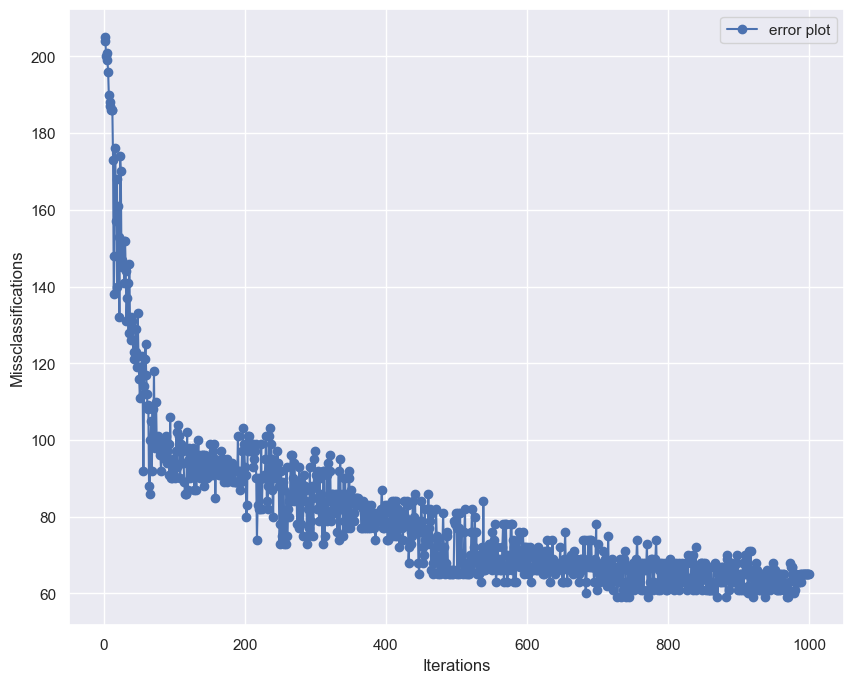

In [8]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

<span style="color: blue;">The training errors decrease as the number of iterations increase.</span>

---

### Conclusion

In summary, we have shown that the perceptron model works well on classifying cancer diagnoses. We only use the first two features in the data, but we have achieved an 87.5% accuracy rate. Through the build of a perceptron is fairly simple, it's enough to yield effective classification results.